In [14]:
#Initialization
import nfldb
#there are some deprecation warnings that we don't want to print
import warnings
warnings.filterwarnings('ignore')

# import pandas and numpy for 
import pandas as pd
import numpy as np

# connect to PostgreSQL
import psycopg2
conn=psycopg2.connect("dbname='nfldb' user='postgres' host='localhost' password='Inhore@28' port=5432")

In [15]:
db = nfldb.connect()
q = nfldb.Query(db)

q.game(season_year=2018, season_type='Regular')
for pp in q.sort('passing_yds').limit(10).as_aggregate():
    print pp.player, pp.passing_yds

Ben Roethlisberger (PIT, QB) 5129
P.Mahomes (UNK, UNK) 5097
Matt Ryan (ATL, QB) 4924
Jared Goff (LA, QB) 4688
Andrew Luck (IND, QB) 4593
Aaron Rodgers (GB, QB) 4442
Tom Brady (NE, QB) 4355
Philip Rivers (SD, QB) 4308
Eli Manning (NYG, QB) 4299
Kirk Cousins (WAS, QB) 4298


In [16]:

db = nfldb.connect()
q = nfldb.Query(db)
q.game(season_year=2018, season_type='Regular')
for pp in q.as_aggregate():
    if str(pp.player.position) in ['QB', 'RB', 'WR', 'TE', 'K']:
        print pp.player

Phil Dawson (SF, K)
Adam Vinatieri (IND, K)
Tom Brady (NE, QB)
Sebastian Janikowski (OAK, K)
Drew Brees (NO, QB)
Matt Bryant (ATL, K)
Josh McCown (CLE, QB)
Antonio Gates (SD, TE)
Matt Schaub (ATL, QB)
Eli Manning (NYG, QB)
Larry Fitzgerald (ARI, WR)
Ben Roethlisberger (PIT, QB)
Philip Rivers (SD, QB)
Benjamin Watson (BAL, TE)
Alex Smith (KC, QB)
Aaron Rodgers (GB, QB)
Mike Nugent (CIN, K)
Frank Gore (IND, RB)
Darren Sproles (PHI, RB)
Derek Anderson (CAR, QB)
Matt Cassel (TEN, QB)
Ryan Fitzpatrick (NYJ, QB)
Matt Prater (DET, K)
Vernon Davis (WAS, TE)
Marcedes Lewis (JAC, TE)
Stephen Gostkowski (NE, K)
Brandon Marshall (NYJ, WR)
Delanie Walker (TEN, TE)
Adrian Peterson (MIN, RB)
Ted Ginn (CAR, WR)
Greg Olsen (CAR, TE)
Mason Crosby (GB, K)
Steven Hauschka (SEA, K)
Danny Amendola (NE, WR)
Matt Ryan (ATL, QB)
Jonathan Stewart (CAR, RB)
Joe Flacco (BAL, QB)
Jordy Nelson (GB, WR)
DeSean Jackson (WAS, WR)
Chad Henne (JAC, QB)
Jamaal Charles (KC, RB)
Matthew Slater (NE, WR)
Josh Johnson (NYG, Q

In [17]:
# query game results
game_results=pd.read_sql("""select season_year, week, home_team, home_score, away_team, away_score
from game
where season_type='Regular'""",con=conn)

# replace la with stl
game_results.replace(to_replace='LA', value='STL', inplace=True)
game_results.replace(to_replace='UNK', value='SD', inplace=True)

# compute wins and ties
game_results['home_win'] = [1 if x>y else 0 for x,y in zip(game_results['home_score'],game_results['away_score'])]
game_results['away_win'] = [1 if x<y else 0 for x,y in zip(game_results['home_score'],game_results['away_score'])]
game_results['tie'] = [1 if x==y else 0 for x,y in zip(game_results['home_score'],game_results['away_score'])]

# sort the dataframe
game_results=game_results.sort_values(by=['season_year','home_team','week'])

# rename the year
game_results=game_results.rename(columns = {'season_year':'year'})

# print first 10 entries
game_results.head(10)

,year,week,home_team,home_score,away_team,away_score,home_win,away_win,tie
864,2009,1,ARI,16,SF,20,0,1,0
153,2009,3,ARI,10,IND,31,0,1,0
250,2009,5,ARI,28,HOU,21,1,0,0
727,2009,8,ARI,21,CAR,34,0,1,0
281,2009,10,ARI,31,SEA,20,1,0,0
829,2009,13,ARI,30,MIN,17,1,0,0
917,2009,16,ARI,31,STL,10,1,0,0
361,2009,17,ARI,7,GB,33,0,1,0
860,2009,1,ATL,19,MIA,7,1,0,0
1115,2009,2,ATL,28,CAR,20,1,0,0


In [18]:
game_results.tail(10)

,year,week,home_team,home_score,away_team,away_score,home_win,away_win,tie
2528,2018,16,TEN,25,WAS,16,1,0,0
2555,2018,17,TEN,17,IND,33,0,1,0
2329,2018,2,WAS,9,IND,21,0,1,0
2346,2018,3,WAS,31,GB,17,1,0,0
2391,2018,6,WAS,23,CAR,17,1,0,0
2408,2018,7,WAS,20,DAL,17,1,0,0
2432,2018,9,WAS,14,ATL,38,0,1,0
2459,2018,11,WAS,21,HOU,23,0,1,0
2505,2018,14,WAS,16,NYG,40,0,1,0
2556,2018,17,WAS,0,PHI,24,0,1,0


In [19]:
game_results.groupby('home_team').count()

,year,week,home_score,away_team,away_score,home_win,away_win,tie
home_team,,,,,,,,
ARI,80,80,80,80,80,80,80,80
ATL,80,80,80,80,80,80,80,80
BAL,80,80,80,80,80,80,80,80
BUF,80,80,80,80,80,80,80,80
CAR,80,80,80,80,80,80,80,80
CHI,80,80,80,80,80,80,80,80
CIN,80,80,80,80,80,80,80,80
CLE,80,80,80,80,80,80,80,80
DAL,80,80,80,80,80,80,80,80


In [20]:
game_results.groupby('away_team').count()

,year,week,home_team,home_score,away_score,home_win,away_win,tie
away_team,,,,,,,,
ARI,80,80,80,80,80,80,80,80
ATL,80,80,80,80,80,80,80,80
BAL,80,80,80,80,80,80,80,80
BUF,80,80,80,80,80,80,80,80
CAR,80,80,80,80,80,80,80,80
CHI,80,80,80,80,80,80,80,80
CIN,80,80,80,80,80,80,80,80
CLE,80,80,80,80,80,80,80,80
DAL,80,80,80,80,80,80,80,80


In [21]:
game_results.describe()

,year,week,home_score,away_score,home_win,away_win,tie
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,2013.500000,9.075000,23.719141,21.298047,0.570703,0.426563,0.002734
std,2.872842,5.009159,10.423001,9.904775,0.495073,0.494674,0.052230
min,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,5.000000,17.000000,14.000000,0.000000,0.000000,0.000000
50%,2013.500000,9.000000,23.000000,21.000000,1.000000,0.000000,0.000000
75%,2016.000000,13.250000,31.000000,27.000000,1.000000,1.000000,0.000000
max,2018.000000,17.000000,62.000000,59.000000,1.000000,1.000000,1.000000


In [22]:
game_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560 entries, 864 to 2556
Data columns (total 9 columns):
year          2560 non-null int64
week          2560 non-null int64
home_team     2560 non-null object
home_score    2560 non-null int64
away_team     2560 non-null object
away_score    2560 non-null int64
home_win      2560 non-null int64
away_win      2560 non-null int64
tie           2560 non-null int64
dtypes: int64(7), object(2)
memory usage: 200.0+ KB


In [23]:
# total number of games
total_games = len(game_results)
total_games

2560

In [24]:
# total number of home wins
home_wins = game_results.home_win.sum()
home_wins

1461

In [25]:
# total home wins/total number of games
home_win_rate = float(home_wins)/float(total_games)
home_win_rate

0.570703125

In [26]:
print("Home Team Win Rate: {:.2f}% ".format(home_win_rate*100))

Home Team Win Rate: 57.07% 


In [27]:
stats=pd.read_sql("""select drive.pos_team, drive.drive_id, drive.pos_time, drive.first_downs, drive.yards_gained, drive.play_count, drive.result, game.season_year, game.week, game.season_type, game.home_team, game.away_team
from drive
inner join game on drive.gsis_id=game.gsis_id
where season_type='Regular'""",con=conn)

#replace la with stl
stats.replace(to_replace='LA', value='STL', inplace=True)
stats.replace(to_replace='LAC', value='SD', inplace=True)
stats.replace(to_replace='UNK', value='SD', inplace=True)

# encode points results
stats['points'] = [3 if x=="Field Goal" else 7 if x=="Touchdown" else 0 for x in stats['result']]

# encode turnover results
stats['turnover'] = [1 if x==("Interception" or "Fumble" or "Safety" or "Blocked FG" or "Fumble, Safety" or "Blocked Punt" or "Blocked Punt, Downs" or "Blocked FG, Downs") else 0 for x in stats['result']]

# look at the table
stats.head(26)


,pos_team,drive_id,pos_time,first_downs,yards_gained,play_count,result,season_year,week,season_type,home_team,away_team,points,turnover
0,MIA,16,00:02,0,0,2,End of Half,2009,7,Regular,MIA,NO,0,0
1,PIT,1,01:44,0,2,5,Punt,2009,1,Regular,PIT,TEN,0,0
2,TEN,2,01:52,0,2,4,Punt,2009,1,Regular,PIT,TEN,0,0
3,PIT,3,03:04,1,2,6,Punt,2009,1,Regular,PIT,TEN,0,0
4,TEN,4,01:36,3,55,6,Missed FG,2009,1,Regular,PIT,TEN,0,0
5,PIT,5,01:55,0,-6,4,Punt,2009,1,Regular,PIT,TEN,0,0
6,TEN,6,03:11,2,35,7,Interception,2009,1,Regular,PIT,TEN,0,1
7,PIT,7,01:32,0,3,3,Interception,2009,1,Regular,PIT,TEN,0,1
8,TEN,8,02:02,1,0,7,Punt,2009,1,Regular,PIT,TEN,0,0
9,PIT,9,05:50,2,53,11,Punt,2009,1,Regular,PIT,TEN,0,0


In [28]:
stats.tail(10)

,pos_team,drive_id,pos_time,first_downs,yards_gained,play_count,result,season_year,week,season_type,home_team,away_team,points,turnover
59909,DEN,12,02:42,1,19,6,Punt,2018,16,Regular,OAK,DEN,0,0
59910,OAK,13,01:15,0,7,4,Punt,2018,16,Regular,OAK,DEN,0,0
59911,DEN,14,03:34,5,82,11,Touchdown,2018,16,Regular,OAK,DEN,7,0
59912,OAK,15,07:20,5,82,17,Touchdown,2018,16,Regular,OAK,DEN,7,0
59913,DEN,16,04:45,5,77,15,Touchdown,2018,16,Regular,OAK,DEN,7,0
59914,OAK,17,01:43,0,5,6,Punt,2018,16,Regular,OAK,DEN,0,0
59915,DEN,18,00:12,0,0,2,Interception,2018,16,Regular,OAK,DEN,0,1
59916,OAK,19,00:58,0,4,6,Field Goal,2018,16,Regular,OAK,DEN,3,0
59917,DEN,20,00:56,0,6,7,Interception,2018,16,Regular,OAK,DEN,0,1
59918,OAK,21,03:42,1,10,8,End of Game,2018,16,Regular,OAK,DEN,0,0


In [29]:
stats.groupby('pos_team').count()

,drive_id,pos_time,first_downs,yards_gained,play_count,result,season_year,week,season_type,home_team,away_team,points,turnover
pos_team,,,,,,,,,,,,,
ARI,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966
ATL,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755
BAL,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905
BUF,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904
CAR,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846
CHI,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873,1873
CIN,1872,1872,1872,1872,1872,1872,1872,1872,1872,1872,1872,1872,1872
CLE,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
DAL,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783


In [30]:
#add next weeks stats
games_19 = game_results[game_results['year']==2018]

nweek = pd.DataFrame({
        'year': np.array([2018] * 32,dtype='int32'),
        'week': np.array([1] * 32,dtype='int32'),
        'team': np.array((list(set(stats.pos_team))),dtype=str)})

nweek_d = nweek
nweek_o = nweek

In [31]:
# defense
stats_d = stats
stats_d['opp_team'] = np.where(stats_d['pos_team']==stats_d['home_team'], stats_d['away_team'], stats_d['home_team'])
#subset to defensive stats
stats_d = stats_d[['season_year','week','opp_team','yards_gained','points','turnover']]
# rename columns
stats_d.columns = ['year','week','team','yards_allowed','points_allowed','turnovers_forced']

#add next week
stats_d = stats_d.append(nweek_d)

# aggregate rolling 5 week
## sort at year, team, week
stats_d.sort_values(by=['team','year','week'],inplace=True)
## sum across year team week
stats_d=stats_d.groupby(by=['team','year','week'],as_index=False).sum()
## rolling 5 week lagged
rolling = stats_d.groupby(['team'],as_index=False)['yards_allowed','points_allowed','turnovers_forced'].rolling(5).sum().shift(1).reset_index()
## join together
stats_d=stats_d.join(rolling,lsuffix='_weekly',rsuffix='_rolling')

stats_d.head(16)

,team,year,week,points_allowed_weekly,turnovers_forced_weekly,yards_allowed_weekly,level_0,level_1,yards_allowed_rolling,points_allowed_rolling,turnovers_forced_rolling
0,ARI,2009,1,20.0,0.0,203.0,0,0,NaN,NaN,NaN
1,ARI,2009,2,17.0,1.0,367.0,0,1,NaN,NaN,NaN
2,ARI,2009,3,31.0,1.0,501.0,0,2,NaN,NaN,NaN
3,ARI,2009,5,21.0,1.0,414.0,0,3,NaN,NaN,NaN
4,ARI,2009,6,3.0,1.0,128.0,0,4,NaN,NaN,NaN
5,ARI,2009,7,17.0,3.0,327.0,0,5,1613.0,92.0,4.0
6,ARI,2009,8,27.0,0.0,355.0,0,6,1737.0,89.0,7.0
7,ARI,2009,9,21.0,1.0,417.0,0,7,1725.0,99.0,6.0
8,ARI,2009,10,20.0,2.0,472.0,0,8,1641.0,89.0,6.0
9,ARI,2009,11,13.0,1.0,314.0,0,9,1699.0,88.0,7.0


In [32]:
# offense
stats_o = stats
stats_o=stats_o.rename(columns = {'pos_team':'team'})
stats_o=stats_o.rename(columns = {'season_year':'year'})
stats_o = stats_o[['team','year','week','first_downs','yards_gained','play_count','points','turnover']]

#add next week
stats_o = stats_o.append(nweek_o)

# aggregate rolling 5 week
## sort at year, team, week
stats_o.sort_values(by=['team','year','week'],inplace=True)
## sum across year team week
stats_o=stats_o.groupby(by=['team','year','week'],as_index=False).sum()
## rolling 5 week lagged
rolling = stats_o.groupby(['team'],as_index=False)['first_downs','yards_gained','play_count','points','turnover'].rolling(5).sum().shift(1).reset_index()
## join together
stats_o=stats_o.join(rolling,lsuffix='_weekly',rsuffix='_rolling')

stats_o.head(10)

,team,year,week,first_downs_weekly,play_count_weekly,points_weekly,turnover_weekly,yards_gained_weekly,level_0,level_1,first_downs_rolling,yards_gained_rolling,play_count_rolling,points_rolling,turnover_rolling
0,ARI,2009,1,17.0,99.0,16.0,2.0,299.0,0,0,NaN,NaN,NaN,NaN,NaN
1,ARI,2009,2,22.0,89.0,24.0,0.0,388.0,0,1,NaN,NaN,NaN,NaN,NaN
2,ARI,2009,3,21.0,97.0,10.0,2.0,317.0,0,2,NaN,NaN,NaN,NaN,NaN
3,ARI,2009,5,19.0,81.0,21.0,0.0,340.0,0,3,NaN,NaN,NaN,NaN,NaN
4,ARI,2009,6,21.0,100.0,27.0,1.0,344.0,0,4,NaN,NaN,NaN,NaN,NaN
5,ARI,2009,7,15.0,88.0,24.0,1.0,288.0,0,5,100.0,1688.0,466.0,98.0,5.0
6,ARI,2009,8,23.0,91.0,21.0,5.0,320.0,0,6,98.0,1677.0,455.0,106.0,4.0
7,ARI,2009,9,27.0,91.0,41.0,1.0,438.0,0,7,99.0,1609.0,457.0,103.0,9.0
8,ARI,2009,10,22.0,98.0,31.0,0.0,462.0,0,8,105.0,1730.0,451.0,134.0,8.0
9,ARI,2009,11,24.0,90.0,21.0,0.0,442.0,0,9,108.0,1852.0,468.0,144.0,8.0


In [33]:
# drop the level variables from offense and defensive
stats_o = stats_o.drop(['level_0','level_1'], axis=1)
stats_d = stats_d.drop(['level_0','level_1'], axis=1)

# combine offense and defense stats
stats_od=pd.merge(stats_d,stats_o,how='inner',on=['team','year','week'])

# drop the year 2009 becasue of the blank weeks
stats_od=stats_od[stats_od['year']!=2009]

# drop the weekly stats because we won't be needing them
weekly_stats = [col for col in stats_od if col.endswith('weekly')]
stats_od = stats_od.drop(weekly_stats, axis=1)

# convert to numeric
stats_od=stats_od.apply(pd.to_numeric, errors='ignore')

In [47]:
stats_o.head(20)

,team,year,week,first_downs_weekly,play_count_weekly,points_weekly,turnover_weekly,yards_gained_weekly,first_downs_rolling,yards_gained_rolling,play_count_rolling,points_rolling,turnover_rolling
0,ARI,2009,1,17.0,99.0,16.0,2.0,299.0,NaN,NaN,NaN,NaN,NaN
1,ARI,2009,2,22.0,89.0,24.0,0.0,388.0,NaN,NaN,NaN,NaN,NaN
2,ARI,2009,3,21.0,97.0,10.0,2.0,317.0,NaN,NaN,NaN,NaN,NaN
3,ARI,2009,5,19.0,81.0,21.0,0.0,340.0,NaN,NaN,NaN,NaN,NaN
4,ARI,2009,6,21.0,100.0,27.0,1.0,344.0,NaN,NaN,NaN,NaN,NaN
5,ARI,2009,7,15.0,88.0,24.0,1.0,288.0,100.0,1688.0,466.0,98.0,5.0
6,ARI,2009,8,23.0,91.0,21.0,5.0,320.0,98.0,1677.0,455.0,106.0,4.0
7,ARI,2009,9,27.0,91.0,41.0,1.0,438.0,99.0,1609.0,457.0,103.0,9.0
8,ARI,2009,10,22.0,98.0,31.0,0.0,462.0,105.0,1730.0,451.0,134.0,8.0
9,ARI,2009,11,24.0,90.0,21.0,0.0,442.0,108.0,1852.0,468.0,144.0,8.0


In [48]:
stats_d.head(20)

,team,year,week,points_allowed_weekly,turnovers_forced_weekly,yards_allowed_weekly,yards_allowed_rolling,points_allowed_rolling,turnovers_forced_rolling
0,ARI,2009,1,20.0,0.0,203.0,NaN,NaN,NaN
1,ARI,2009,2,17.0,1.0,367.0,NaN,NaN,NaN
2,ARI,2009,3,31.0,1.0,501.0,NaN,NaN,NaN
3,ARI,2009,5,21.0,1.0,414.0,NaN,NaN,NaN
4,ARI,2009,6,3.0,1.0,128.0,NaN,NaN,NaN
5,ARI,2009,7,17.0,3.0,327.0,1613.0,92.0,4.0
6,ARI,2009,8,27.0,0.0,355.0,1737.0,89.0,7.0
7,ARI,2009,9,21.0,1.0,417.0,1725.0,99.0,6.0
8,ARI,2009,10,20.0,2.0,472.0,1641.0,89.0,6.0
9,ARI,2009,11,13.0,1.0,314.0,1699.0,88.0,7.0


In [49]:
stats_od.head(20)

,team,year,week,ya,pa,tf,fd,yg,pc,p,t
16,ARI,2010,1,1507.0,92.0,10.0,91.0,1577.0,404.0,109.0,6.0
17,ARI,2010,2,1517.0,88.0,11.0,92.0,1557.0,406.0,96.0,6.0
18,ARI,2010,3,1634.0,105.0,9.0,92.0,1579.0,406.0,93.0,7.0
19,ARI,2010,4,1709.0,111.0,8.0,89.0,1466.0,397.0,86.0,7.0
20,ARI,2010,5,1890.0,135.0,5.0,73.0,1183.0,369.0,58.0,9.0
21,ARI,2010,7,1903.0,131.0,7.0,72.0,1201.0,385.0,67.0,7.0
22,ARI,2010,8,1880.0,140.0,4.0,64.0,1050.0,374.0,60.0,8.0
23,ARI,2010,9,1843.0,123.0,4.0,75.0,1177.0,393.0,81.0,9.0
24,ARI,2010,10,1993.0,127.0,5.0,70.0,1175.0,392.0,74.0,8.0
25,ARI,2010,11,2064.0,129.0,6.0,79.0,1378.0,410.0,88.0,7.0


In [34]:
# create a new games dataframe from game_results
games = game_results

# rename columns
stats_od.columns=['team','year','week','ya','pa','tf','fd','yg','pc','p','t']

# merge game results with stats; there need to be two merges because both home and away teams need statistics
games=pd.merge(pd.merge(games,stats_od,left_on=['home_team','year','week'],right_on=['team','year','week']),stats_od,left_on=['away_team','year','week'],right_on=['team','year','week'],suffixes=['_home','_away'])

# comptue diffs for each variable
diffs=['ya','pa','tf','fd','yg','pc','p','t']
for i in diffs:
    diff_column = i + "_diff"
    home_column = i + "_home"
    away_column = i + "_away"
    games[diff_column] = games[home_column] - games[away_column]

# we only need the diffs, so drop all the home/away specific stats columns
home = [col for col in games if col.endswith('home')]
away = [col for col in games if col.endswith('away')]
games = games.drop(home,axis=1)
games = games.drop(away,axis=1)

In [40]:
games

,year,week,home_team,home_score,away_team,away_score,home_win,away_win,tie,ya_diff,pa_diff,tf_diff,fd_diff,yg_diff,pc_diff,p_diff,t_diff
0,2010,3,ARI,24,OAK,23,1,0,0,130.0,-10.0,8.0,-15.0,-168.0,-68.0,22.0,-1.0
1,2010,5,ARI,30,NO,20,1,0,0,240.0,40.0,2.0,-23.0,-406.0,-70.0,-29.0,6.0
2,2010,8,ARI,35,TB,38,0,1,0,98.0,34.0,-4.0,-27.0,-512.0,-60.0,-16.0,6.0
3,2010,10,ARI,18,SEA,36,0,1,0,83.0,10.0,3.0,1.0,-44.0,-50.0,18.0,4.0
4,2010,12,ARI,6,SF,27,0,1,0,472.0,50.0,-1.0,8.0,-25.0,1.0,8.0,4.0
5,2010,13,ARI,6,STL,19,0,1,0,366.0,26.0,1.0,-14.0,-65.0,-44.0,-30.0,5.0
6,2010,14,ARI,43,DEN,13,1,0,0,15.0,3.0,4.0,-27.0,-419.0,-15.0,-54.0,2.0
7,2010,16,ARI,27,DAL,26,1,0,0,-312.0,-24.0,-5.0,-41.0,-459.0,-59.0,-64.0,1.0
8,2010,2,ATL,41,ARI,7,1,0,0,-84.0,-25.0,-3.0,5.0,156.0,42.0,-10.0,-2.0
9,2010,4,ATL,16,SF,14,1,0,0,21.0,-30.0,5.0,46.0,389.0,68.0,36.0,-2.0


In [35]:
import statsmodels.api as sm

# create past games df that will be used to train our model
past_games = games[(games['year']!=max(games.year)) & (games['week']!=max(games_19.week))]

# create future games df that will be predicted using our trained model
future_games = games[(games['year']==max(games.year)) & (games['week']==1)]

# for statsmodels, we need to specify
past_games['intercept'] = 1.0
future_games['intercept'] = 1.0

# our training columns will be the diffs
training_cols = [col for col in games if col.endswith('diff')]
# need to add the intercept column
training_cols_intercept = training_cols + ["intercept"]

# perform the regression
logit = sm.Logit(past_games['home_win'], past_games[training_cols_intercept])

# save the results and print
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.647091
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               home_win   No. Observations:                 1920
Model:                          Logit   Df Residuals:                     1911
Method:                           MLE   Df Model:                            8
Date:                Sat, 20 Apr 2019   Pseudo R-squ.:                 0.05541
Time:                        17:04:37   Log-Likelihood:                -1242.4
converged:                       True   LL-Null:                       -1315.3
                                        LLR p-value:                 1.498e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ya_diff       -0.0002      0.000     -0.904      0.366      -0.001       0.000
pa_diff       -0.0060      0.

In [36]:
# predict the results 
preds=result.predict(future_games[training_cols_intercept])

# add probabilities to next week
future_games['win_prob'] = preds

# home team wins if team has greater than 50% chance of winning
future_games['winner'] = np.where(future_games['win_prob']>.5,future_games['home_team'],future_games['away_team'])

# show select columns
future_games[['home_team','away_team','winner','win_prob']]

,home_team,away_team,winner,win_prob
2048,ARI,WAS,ARI,0.654631
2064,BAL,BUF,BAL,0.731394
2080,CAR,DAL,DAL,0.456948
2104,CLE,PIT,PIT,0.307805
2120,DEN,SEA,DEN,0.596954
2128,DET,NYJ,DET,0.762959
2136,GB,CHI,CHI,0.447075
2152,IND,CIN,IND,0.572574
2176,MIA,TEN,MIA,0.567619
2184,MIN,SF,MIN,0.524018


In [37]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# specify the alphas
param_grid = {'C': np.logspace(-5, 5, 15)}

# Instantiate a logistic regression classifier: logreg
logit = LogisticRegression()

# specify five-fold cross validation logistic regression while tuning over alpha space
logit_cv = GridSearchCV(logit, param_grid, cv=5)

# fit the model
logit_cv.fit(past_games[training_cols],past_games['home_win'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 5.17947e-05, 2.68270e-04, 1.38950e-03, 7.19686e-03,
       3.72759e-02, 1.93070e-01, 1.00000e+00, 5.17947e+00, 2.68270e+01,
       1.38950e+02, 7.19686e+02, 3.72759e+03, 1.93070e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

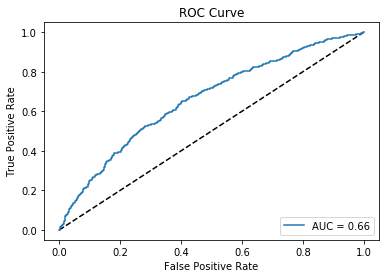

In [50]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logit_cv.predict_proba(past_games[training_cols])[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(past_games['home_win'], y_pred_prob)

#compute area under the curve
auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# predict the results 
preds=logit_cv.predict(future_games[training_cols])

future_games['prediction'] = preds
future_games['pred_winner'] = np.where(future_games['prediction']==1,future_games['home_team'],future_games['away_team'])
future_games['actual_winner'] = np.where(future_games['home_win']==1,future_games['home_team'],future_games['away_team'])
future_games['pred_home_win_prob'] = logit_cv.predict_proba(future_games[training_cols])[:,1]
future_games[['home_team','away_team','pred_home_win_prob','pred_winner','actual_winner']]

,home_team,away_team,pred_home_win_prob,pred_winner,actual_winner
2048,ARI,WAS,0.649504,ARI,WAS
2064,BAL,BUF,0.727298,BAL,BAL
2080,CAR,DAL,0.453012,DAL,CAR
2104,CLE,PIT,0.305163,PIT,PIT
2120,DEN,SEA,0.592266,DEN,DEN
2128,DET,NYJ,0.758826,DET,NYJ
2136,GB,CHI,0.443295,CHI,GB
2152,IND,CIN,0.567804,IND,CIN
2176,MIA,TEN,0.563173,MIA,MIA
2184,MIN,SF,0.519212,MIN,MIN


In [65]:
#Predictions are the columns
#Actual is the rows
print(classification_report(future_games['home_win'],preds))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.55      0.75      0.63         8

   micro avg       0.56      0.56      0.56        16
   macro avg       0.57      0.56      0.55        16
weighted avg       0.57      0.56      0.55        16



In [66]:
print(confusion_matrix(future_games['home_win'],preds))

[[3 5]
 [2 6]]


In [58]:
future_games['home_win']

2048    0
2064    1
2080    1
2104    0
2120    1
2128    0
2136    1
2152    0
2176    1
2184    1
2192    1
2200    0
2208    0
2224    0
2232    1
2248    0
Name: home_win, dtype: int64

In [59]:
preds

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [62]:
future_games['home_win']==preds

2048    False
2064     True
2080    False
2104     True
2120     True
2128    False
2136    False
2152    False
2176     True
2184     True
2192     True
2200    False
2208     True
2224     True
2232     True
2248    False
Name: home_win, dtype: bool